In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ratings_df = pd.read_csv("../../movielens-20m-dataset/rating.csv")

In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
ratings_df.duplicated().sum()

0

In [6]:
unique_user_ids = ratings_df.userId.nunique()
unique_movie_ids = ratings_df.movieId.nunique()
item_user_matrix_size = unique_movie_ids * unique_user_ids
number_of_ratings = len(ratings_df)
print(f"Size of item-user matrix: {item_user_matrix_size} >> {number_of_ratings} Number of actual ratings")

Size of item-user matrix: 3703856792 >> 20000263 Number of actual ratings


In [7]:
avg_user_ratings = ratings_df.groupby(["userId"]).mean(numeric_only=True)
avg_user_ratings.head()
assert avg_user_ratings.rating.min() >= 0.0 and avg_user_ratings.rating.max() <= 5.0

## Number of ratings per user

number of ratings per user vary between 20 and 9254


[]

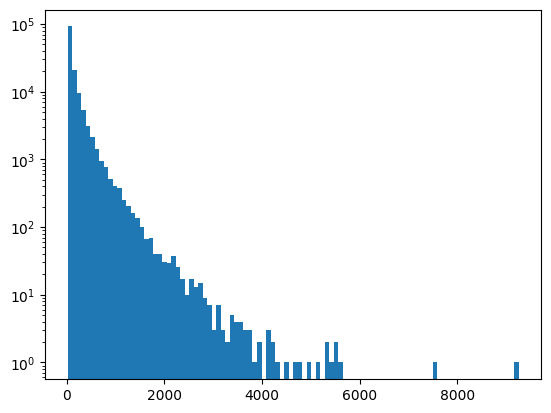

In [8]:
num_user_ratings = ratings_df[["userId", "rating"]].groupby(["userId"]).count().reset_index().rename(columns={"rating": "ratingsGiven"})
print(f"number of ratings per user vary between {num_user_ratings.ratingsGiven.min()} and {num_user_ratings.ratingsGiven.max()}")
plt.yscale('log')
plt.hist(num_user_ratings.ratingsGiven, bins=100)
plt.plot()

In [9]:
num_user_ratings.head()

,userId,ratingsGiven
0,1,175
1,2,61
2,3,187
3,4,28
4,5,66


In [10]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [302]:
most_common_user_ids = ratings_df.userId.value_counts().head(200)
most_common_user_ids

userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
130622    2165
10761     2164
54113     2161
110706    2159
91349     2159
Name: count, Length: 200, dtype: int64

In [303]:
most_common_movie_ids = ratings_df.movieId.value_counts().head(1_000)
most_common_movie_ids

movieId
296      67310
356      66172
318      63366
593      63299
480      59715
         ...  
1589      5044
1049      5039
915       5029
38061     5026
383       5025
Name: count, Length: 1000, dtype: int64

In [304]:
ratings_df_subset = ratings_df[(ratings_df.userId.isin(most_common_user_ids.index)) & (ratings_df.movieId.isin(most_common_movie_ids.index))]
ratings_df_subset

,userId,movieId,rating,timestamp
19846,156,1,5.0,2002-11-19 20:54:26
19847,156,2,5.0,2002-12-26 21:20:49
19848,156,3,2.0,2002-12-02 03:53:45
19850,156,5,3.0,2002-12-26 23:16:23
19851,156,6,4.0,2002-11-20 19:55:17
...,...,...,...,...
19963231,138208,78499,4.0,2012-03-05 01:08:34
19963237,138208,79132,3.0,2012-03-05 01:08:40
19963240,138208,80463,4.5,2012-03-05 01:10:09
19963248,138208,81591,3.5,2012-03-05 01:07:50


In [305]:
new_most_common_movie_ids = ratings_df_subset["movieId"].value_counts()
new_most_common_movie_ids

movieId
1097    199
608     198
593     197
1214    197
296     197
       ... 
222      78
277      76
140      69
362      68
107      67
Name: count, Length: 1000, dtype: int64

In [306]:
new_most_common_user_ids = ratings_df_subset["userId"].value_counts()
new_most_common_user_ids

userId
8405      999
118205    988
118754    964
74142     952
71975     949
         ... 
80092     469
59414     464
131894    417
98865     348
81186     326
Name: count, Length: 200, dtype: int64

In [307]:
ratings_train = ratings_df_subset.sample(frac=0.8, random_state=42)
ratings_test = ratings_df_subset.drop(ratings_train.index)

In [308]:
ratings_df_subset.nunique()

userId          200
movieId        1000
rating           10
timestamp    128829
dtype: int64

In [309]:
ratings_train.nunique()

userId          200
movieId        1000
rating           10
timestamp    104872
dtype: int64

In [310]:
ratings_test.nunique()

userId         200
movieId       1000
rating          10
timestamp    28367
dtype: int64

In [311]:
ratings_train

,userId,movieId,rating,timestamp
6127222,42204,1025,3.0,2004-08-04 04:22:20
16935972,117144,1204,4.0,2001-08-25 01:43:54
16935769,117144,317,3.0,2005-04-11 17:54:56
4713191,32344,3752,3.5,2006-04-10 18:40:26
10718686,74142,1517,4.0,2006-12-04 16:08:09
...,...,...,...,...
18886954,130767,3060,4.0,2010-06-27 19:21:43
12933823,89307,2797,2.5,2005-03-22 07:43:13
14741248,101861,193,4.0,2002-08-05 22:39:01
12949581,89402,1370,4.5,2009-07-01 19:55:34


In [312]:
movies_per_user_train = ratings_train.groupby("userId").apply(lambda x: pd.Series({'ratedMovies': dict(zip(x["movieId"], x["rating"])),
                                                                                 'meanRating': x["rating"].mean()}), include_groups=False)
movies_per_user_train.head()

,ratedMovies,meanRating
userId,,
156,"{1499: 4.0, 4025: 4.0, 2085: 5.0, 141: 4.0, 10...",4.035141
741,"{1945: 5.0, 3252: 5.0, 1125: 5.0, 196: 2.0, 10...",3.903030
903,"{837: 2.0, 2953: 3.0, 1953: 3.0, 17: 3.0, 1257...",3.153355
982,"{1805: 3.0, 648: 2.5, 3253: 3.0, 1275: 3.0, 24...",3.274436
2261,"{4002: 2.0, 5502: 3.0, 596: 3.5, 3827: 3.0, 11...",2.913934


In [313]:
num_users_train = len(movies_per_user_train)
print(num_users_train)

200


<Axes: >

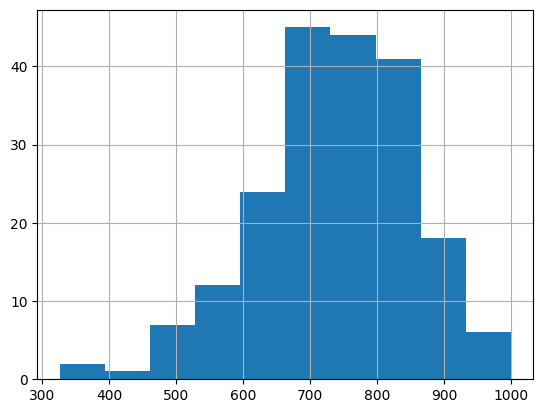

In [315]:
new_most_common_user_ids = ratings_df_subset["userId"].value_counts()
new_most_common_user_ids.hist()

In [316]:
sparse_weights = {}
min_common_movies = 5
for user_id in movies_per_user_train.index:
    sparse_weights[user_id] = []

for i, (user_id, row) in enumerate(movies_per_user_train.iterrows()):
    rated_movies_i = row["ratedMovies"]
    for user_prime_id in reversed(movies_per_user_train.index):
        if user_prime_id == user_id:
            break
        record = movies_per_user_train.loc[user_prime_id]
        rated_movies_prime = record["ratedMovies"]
        intersection = set(rated_movies_i).intersection(set(rated_movies_prime))
        if len(intersection) > min_common_movies:
            user_ratings = pd.Series(rated_movies_i)
            user_prime_ratings = pd.Series(rated_movies_prime)
            with np.errstate(divide="ignore", invalid="ignore"):
                correlation_coefficient = user_ratings.corr(user_prime_ratings)
            if np.isnan(correlation_coefficient):
                continue
            sparse_weights[user_id].append((user_prime_id, correlation_coefficient))
            sparse_weights[user_prime_id].append((user_id, correlation_coefficient))

In [329]:
def predict_score(row):
    sum_weights = 0
    weighted_sum = 0
    user_id = row["userId"]
    movie_id = row["movieId"]
    for user_prime_id, weight in sparse_weights[user_id]:
        record = movies_per_user_train.loc[user_prime_id]
        rating_prime = record["ratedMovies"].get(movie_id)
        if rating_prime is not None:
            sum_weights += abs(weight)
            weighted_sum += weight * (rating_prime - record["meanRating"])
    if sum_weights != 0:
        deviation_score = weighted_sum / sum_weights
        return movies_per_user_train.loc[user_id]["meanRating"] + deviation_score
    else:
        return np.nan

In [334]:
ratings_train["prediction"] = ratings_train.apply(predict_score, axis=1)
ratings_train

,userId,movieId,rating,timestamp,prediction
6127222,42204,1025,3.0,2004-08-04 04:22:20,3.193593
16935972,117144,1204,4.0,2001-08-25 01:43:54,4.386691
16935769,117144,317,3.0,2005-04-11 17:54:56,2.962840
4713191,32344,3752,3.5,2006-04-10 18:40:26,2.510493
10718686,74142,1517,4.0,2006-12-04 16:08:09,2.547687
...,...,...,...,...,...
18886954,130767,3060,4.0,2010-06-27 19:21:43,3.468246
12933823,89307,2797,2.5,2005-03-22 07:43:13,2.940935
14741248,101861,193,4.0,2002-08-05 22:39:01,1.847236
12949581,89402,1370,4.5,2009-07-01 19:55:34,3.376847


In [335]:
ratings_train["prediction"].isna().sum()

0

In [336]:
ratings_train["prediction"] = ratings_train["prediction"].apply(lambda x: min(5, max(0, x)))

In [337]:
ratings_train["prediction"].max(), ratings_train["prediction"].min()

(5.0, 0.5898238309296531)

In [341]:
mse = ((ratings_train["rating"] - ratings_train["prediction"]) ** 2).mean()
mse

0.6215169436883158

<Axes: >

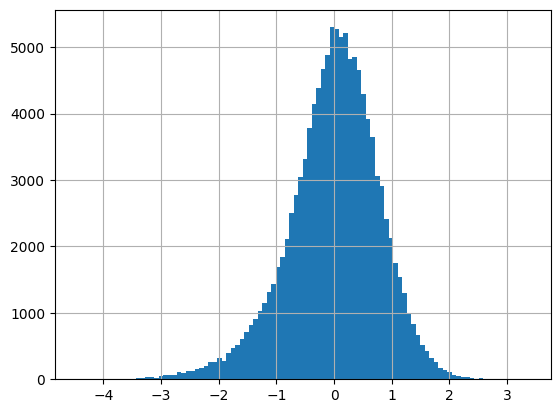

In [340]:
error = (ratings_train["rating"] - ratings_train["prediction"])
error.hist(bins=100)

In [342]:
ratings_test["prediction"] = ratings_test.apply(predict_score, axis=1)
ratings_test

,userId,movieId,rating,timestamp,prediction
19852,156,7,4.0,2002-12-02 03:58:27,3.556394
19866,156,25,4.0,2002-11-14 19:58:48,4.200179
19867,156,32,5.0,2002-12-27 22:49:13,4.484650
19868,156,34,3.0,2002-12-06 19:26:53,4.416884
19874,156,45,2.0,2002-12-19 20:12:27,3.901085
...,...,...,...,...,...
19963096,138208,59315,3.5,2009-01-29 05:52:18,3.230597
19963113,138208,60684,3.5,2012-03-05 01:08:11,2.884185
19963190,138208,71535,3.5,2009-12-31 05:53:11,2.971402
19963231,138208,78499,4.0,2012-03-05 01:08:34,3.469257


In [343]:
ratings_test["prediction"] = ratings_test["prediction"].apply(lambda x: min(5, max(0, x)))

In [345]:
mse_test = ((ratings_test["rating"] - ratings_test["prediction"]) ** 2).mean()
mse_test

0.630261642537201